In [1]:
import sys
from pathlib import Path

In [2]:
%load_ext autoreload
%autoreload 3 -p
%matplotlib inline

Below is just a demo of the features.
Refer to [Datasets API Reference](https://ajkdrag.github.io/ocrtoolkit/ocrtoolkit/datasets/index.html) for details.

## imports

In [3]:
from ocrtoolkit.datasets import ImageDS, FileDS

/home/ajkdrag/workspace/ocrtoolkit/src/ocrtoolkit/utilities/io_utils.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## loading images from directory

In [4]:
images_dir = "../data/public/images"

In [5]:
ds = FileDS(images_dir)

  0%|          | 0/237 [00:00<?, ?it/s]

2024-03-16 13:17:56.654 | INFO     | ocrtoolkit.utilities.io_utils:get_files:57 - Found 235 files.


In [6]:
len(ds)

235

### supports indexing by id

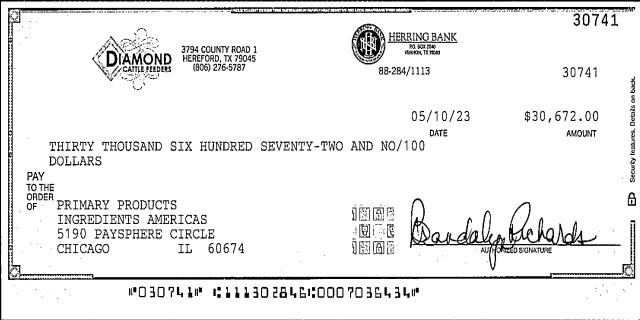

In [7]:
ds[3]

### supports indexing by image name

In [8]:
ds.names[3]

'86103bd7-173_jpg.rf.c828bb5b9ddf652994f36c418e0144d1.jpg'

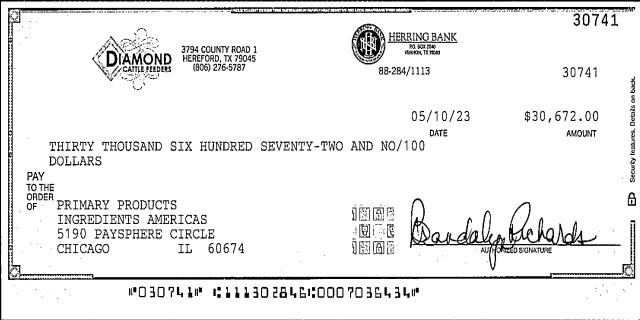

In [9]:
ds['86103bd7-173_jpg.rf.c828bb5b9ddf652994f36c418e0144d1.jpg']

### supports sequential slicing by `batch()`

In [10]:
# equivalent to something like: ds[10:20]
batch_no_two = ds.batch(bs=10, bs_idx=1)

In [11]:
print(batch_no_two[0] == ds[10])
print(batch_no_two[-1] == ds[19])

True
True


In [12]:
type(batch_no_two).__name__

'FileDS'

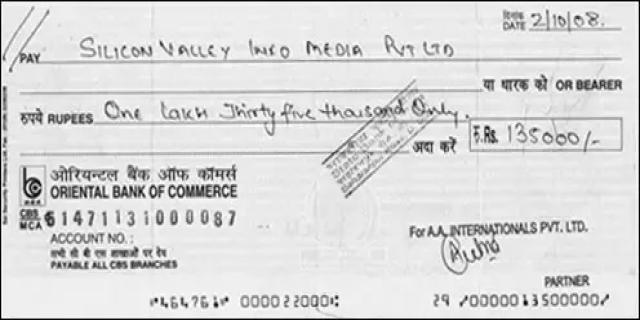

In [13]:
# can do random sample as well
ds.sample()[1]

## wrapping PIL/cv2 images

In [14]:
few_pil_images = [img for img in ds.sample()]

In [15]:
len(few_pil_images)

5

In [16]:
type(few_pil_images[0])

PIL.Image.Image

In [17]:
img_ds = ImageDS(few_pil_images)

In [18]:
img_ds.names

['Image: 0', 'Image: 1', 'Image: 2', 'Image: 3', 'Image: 4']

In [19]:
# can index by name or id. Similar to FileDS
img_ds["Image: 1"] == img_ds[1]

True

## saving and loading datasets

In [20]:
img_ds.save("temp/demo_save.h5")

2024-03-16 13:18:02.309 | INFO     | ocrtoolkit.datasets.base:save:185 - Dataset saved to temp/demo_save.h5


In [36]:
# saving for FileDS works in the same manner
loaded_ds = ImageDS.load("temp/demo_save.h5")

2024-03-16 13:21:20.500 | INFO     | ocrtoolkit.datasets.base:load:204 - Dataset loaded from temp/demo_save.h5


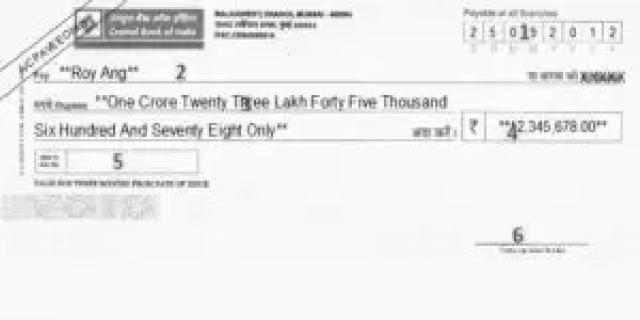

In [37]:
loaded_ds[0]

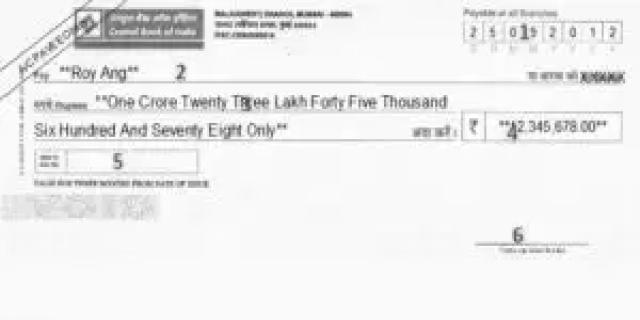

In [38]:
img_ds[0]